# 데이터 불러오기 & 전처리

In [ ]:
!pip install adjustText

In [1]:
import pandas as pd
import numpy as np
%config InlineBackend.figure_format = 'retina'

In [ ]:
# colab과 google drive 연결

from google.colab import drive
drive.mount('/content/drive')

# 논문 소개
<img width="918" alt="스크린샷 2022-08-12 오후 6 26 27" src="https://user-images.githubusercontent.com/54663536/184326015-2ae7c0ba-94f8-4dbd-9115-3a0c9a9b1873.png">
<img width="832" alt="스크린샷 2022-08-12 오후 6 31 33" src="https://user-images.githubusercontent.com/54663536/184326865-2eba0c38-2311-4800-8d18-40ee7d0bf281.png">
<img width="910" alt="스크린샷 2022-08-12 오후 6 31 43" src="https://user-images.githubusercontent.com/54663536/184326875-68d1a85c-6799-4922-951a-3af6e84e9c1b.png">


In [114]:
len(df)

31

In [2]:
df = pd.read_csv('linear_regression_data.csv')
df.head()

,Cancer type,Lifetime cancer risk,Total number of normal cells in tissue of origin,Number of normal stem cells in tissue of origin (s),Number of divisions of each stem cell per year
0,Acute myeloid leukemia,0.0041,3.000000e+12,135000000,12.0
1,Basal cell carcinoma,0.3000,1.800000e+11,5820000000,7.6
2,Chronic lymphocytic leukemia,0.0052,3.000000e+12,135000000,12.0
3,Colorectal adenocarcinoma,0.0480,3.000000e+10,200000000,73.0
4,Colorectal adenocarcinoma with FAP,1.0000,3.000000e+10,200000000,73.0


### 컬럼 설명
- Cancer type
- Lifetime cancer risk
- Total number of normal cells in tissue of origin
- Number of normal stem cells in tissue of origin (s)
- Number of division of each stem cell per year : 
Lifetime cancer risk and parameters related to the normal stem cells that are
precursors of these cancers. “Stem cells” denote the self-renewing cell population responsible for the homeostasis of the relevant cells in the indicated tissues. Lifetime parameters were obtained from estimates of the frequency of tissue self-renewal, assuming an average lifespan of 80 years. The definitions for the parameters s, d, and lscd are provided in the Statistical Analysis section of the Materials and Methods section. The literature sources for the parameters listed in this Table are provided for each cancer type in the Materials and Methods section.

In [4]:
df['Number of divisions of each stem cell per lifetime (d)'] =\
        df['Number of divisions of each stem cell per year'].map(lambda x: x*80)

# df['Number of divisions of each stem cell per lifetime (d)'] =\
                #    df['Number of divisions of each stem cell per year'] * 80

df.head()

,Cancer type,Lifetime cancer risk,Total number of normal cells in tissue of origin,Number of normal stem cells in tissue of origin (s),Number of divisions of each stem cell per year,Number of divisions of each stem cell per lifetime (d)
0,Acute myeloid leukemia,0.0041,3.000000e+12,135000000,12.0,960.0
1,Basal cell carcinoma,0.3000,1.800000e+11,5820000000,7.6,608.0
2,Chronic lymphocytic leukemia,0.0052,3.000000e+12,135000000,12.0,960.0
3,Colorectal adenocarcinoma,0.0480,3.000000e+10,200000000,73.0,5840.0
4,Colorectal adenocarcinoma with FAP,1.0000,3.000000e+10,200000000,73.0,5840.0


# 통계 분석
The total number of stem cell division in the lifetime of a tissue(조직의 일생 동안 줄기 세포 분열의 총 수)  
The total number of stem cells found in a fully developed tissue(완전히 발달된 조직에서 발견되는 줄기 세포의 총 수) = s라고 하고 s는 2의 거듭제곱으로 세포 사멸이 없습니다.   
해당 조직의 첫 번째 전구 세포에서 시작하여 이러한 모든 세포를 생성하는 데는 발달 동안 x 세대가 필요합니다. 여기서 2 x= s입니다.   
조직이 완전히 발달된 후에, 이들 각각의 세포는 그 조직의 일생 동안 정상적인 조직 전환으로 인해 총 d회의 추가 분열을 겪습니다.   
이러한 턴오버 분할은 비대칭으로 가정되지만 세포자멸사와 대칭적 자가 재생 사이의 균형은 항상성 상태의 조직에 대해 동일한 평균 세포 분할 수를 산출할 수 있습니다.   
따라서 일생 동안의 모든 줄기세포(일생 줄기세포 분열의 경우 lscd) 중 각각 새로운 줄기세포를 생성하는 분열 사건의 누적 횟수는 다음과 같습니다.
  
s 및 d에 대한 추정치는 표 1에 제공되어 있습니다. 각 암 유형에 대해 𝑙𝑠𝑐𝑑 =𝑠 (2 + 𝑑) − 2는 본문의 그림 1에서 해당 특정 유형의 평생 발병률에 대해 플롯팅되었습니다.

In [10]:
s = df['Number of normal stem cells in tissue of origin (s)']
d = df['Number of divisions of each stem cell per lifetime (d)']
lscd = s*(2 + d) - 2
df['Cumulative number of divisions of all stem cells per lifetime (lscd)'] = lscd
df.head()

,Cancer type,Lifetime cancer risk,Total number of normal cells in tissue of origin,Number of normal stem cells in tissue of origin (s),Number of divisions of each stem cell per year,Number of divisions of each stem cell per lifetime (d),Cumulative number of divisions of all stem cells per lifetime (lscd)
0,Acute myeloid leukemia,0.0041,3.000000e+12,135000000,12.0,960.0,1.298700e+11
1,Basal cell carcinoma,0.3000,1.800000e+11,5820000000,7.6,608.0,3.550200e+12
2,Chronic lymphocytic leukemia,0.0052,3.000000e+12,135000000,12.0,960.0,1.298700e+11
3,Colorectal adenocarcinoma,0.0480,3.000000e+10,200000000,73.0,5840.0,1.168400e+12
4,Colorectal adenocarcinoma with FAP,1.0000,3.000000e+10,200000000,73.0,5840.0,1.168400e+12


In [13]:
df['Cumulative number of divisions of all stem cells per lifetime (lscd)'].to_numpy()

array([1.29870000e+11, 3.55020000e+12, 1.29870000e+11, 1.16840000e+12,
       1.16840000e+12, 1.16840000e+12, 7.68800000e+09, 7.68800000e+09,
       1.20441600e+09, 7.79519980e+07, 2.69999998e+08, 3.18570000e+10,
       3.18570000e+10, 2.25750000e+11, 2.25750000e+11, 9.27200000e+09,
       9.27200000e+09, 2.71999998e+08, 7.61520000e+11, 3.07647980e+07,
       4.78399800e+06, 6.32959800e+06, 1.17023980e+07, 3.31199800e+06,
       2.19999980e+07, 3.42760000e+11, 6.06800000e+09, 2.88200000e+11,
       3.35520000e+09, 5.82399998e+08, 5.82399980e+07])

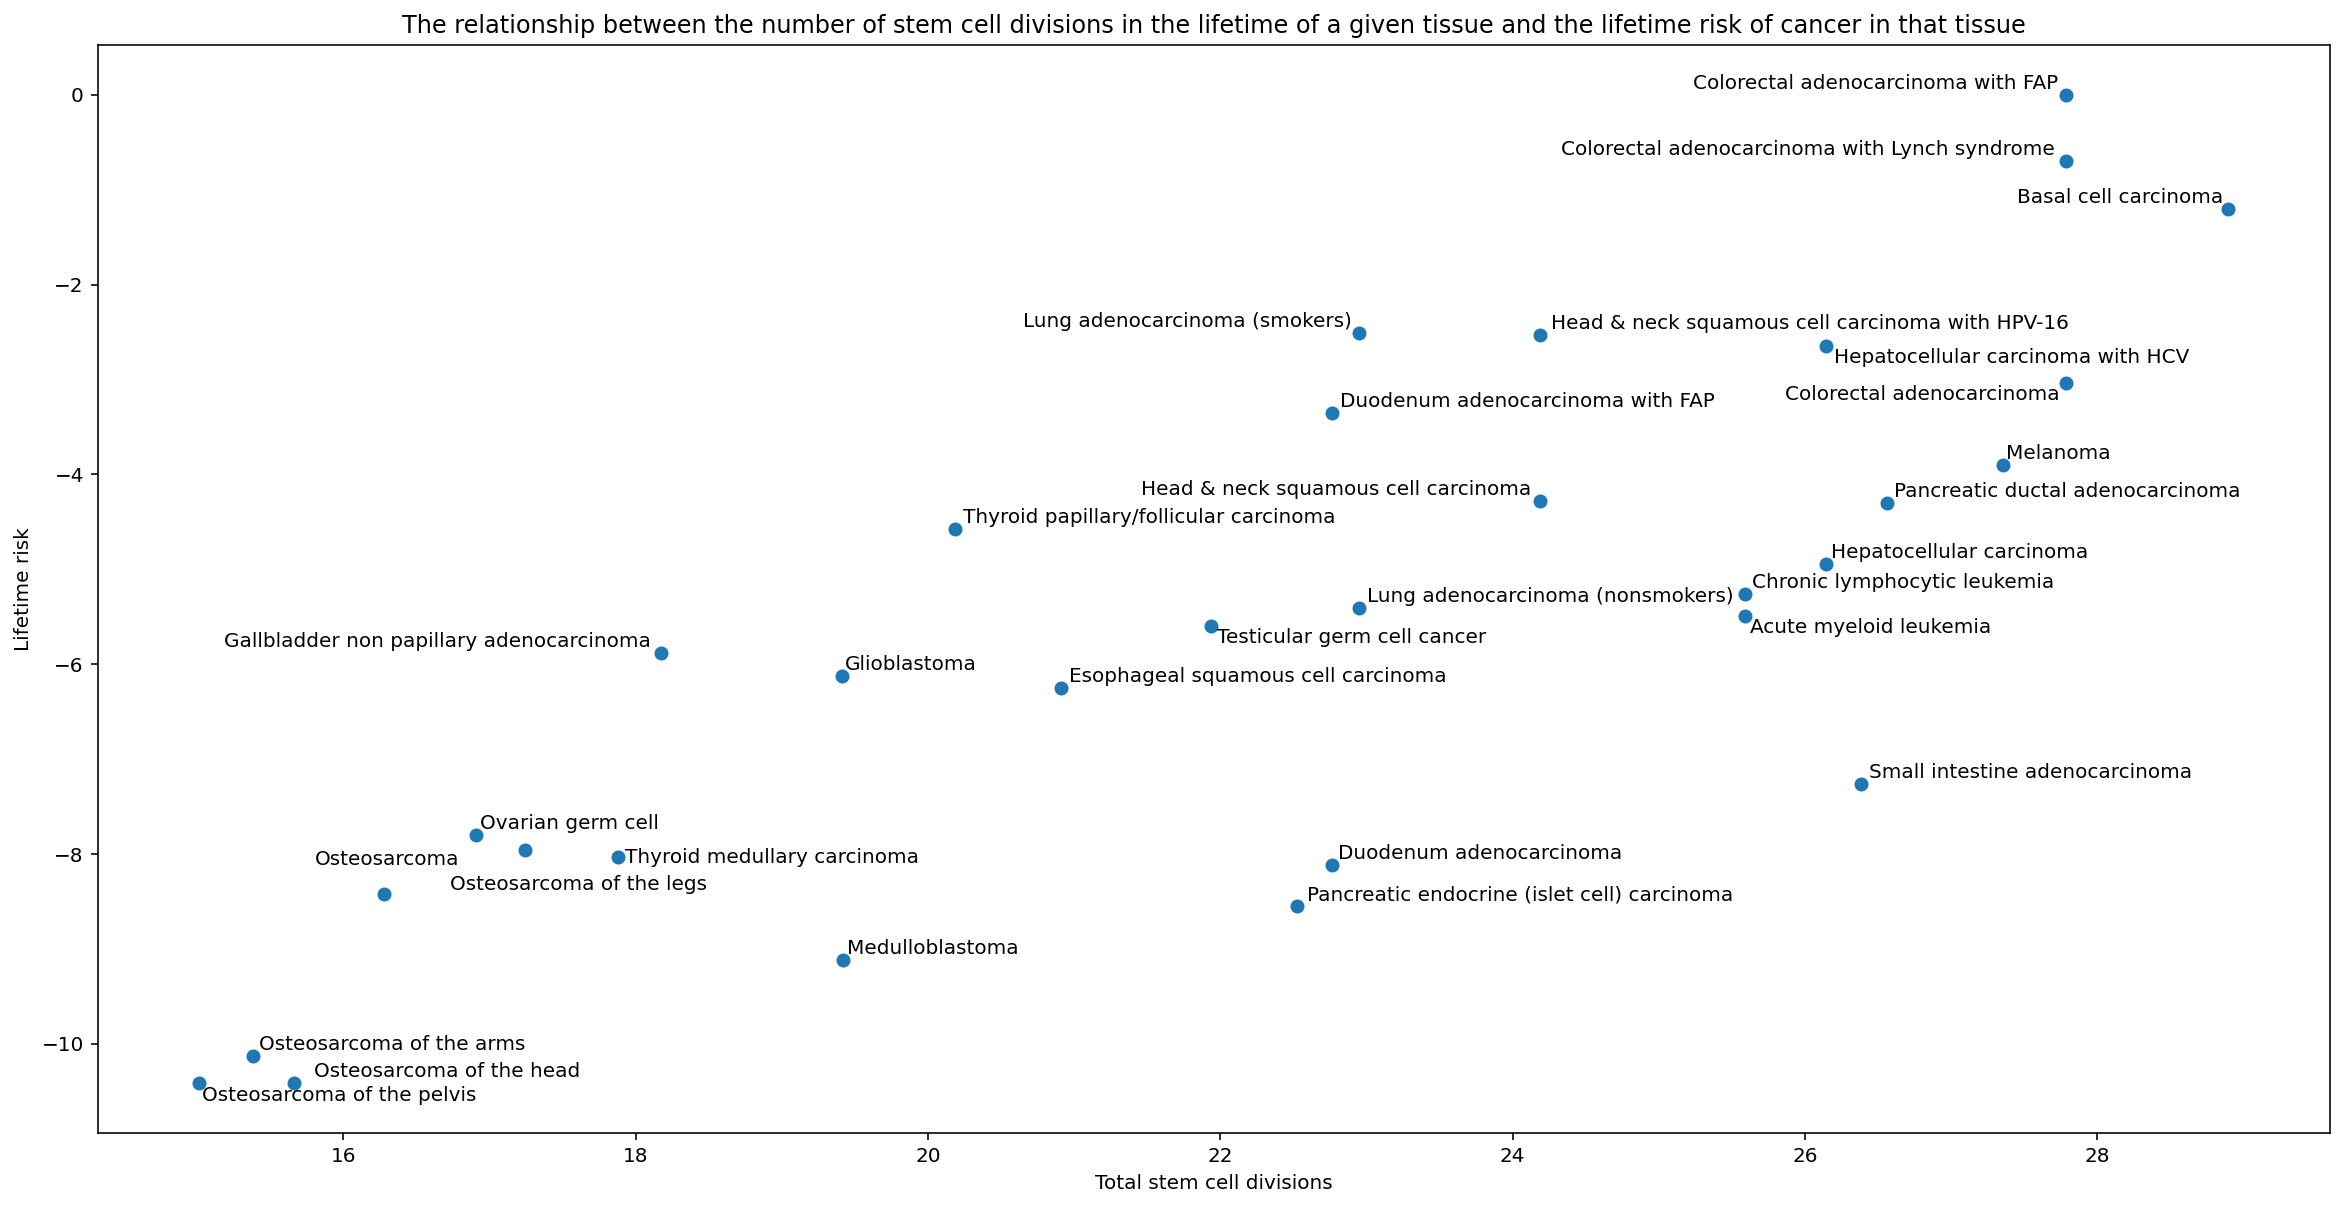

In [54]:
import matplotlib.pyplot as plt
from adjustText import adjust_text

X = np.log(df['Cumulative number of divisions of all stem cells per lifetime (lscd)'].to_numpy())
y = np.log(df['Lifetime cancer risk'].to_numpy())

plt.figure(figsize=(20, 10)) 
plt.title('The relationship between the number of stem cell divisions in the lifetime of a given tissue and the lifetime risk of cancer in that tissue')
plt.xlabel('Total stem cell divisions')
plt.ylabel('Lifetime risk')
plt.scatter(X, y)

text = []
for xpoint, ypoint, name in zip(X, y, df['Cancer type']):
    text.append(plt.text(xpoint, ypoint, name))
 
adjust_text(text)
plt.show()

# LinearRegression 학습

### https://scikit-learn.org/stable/user_guide.html 

In [ ]:
X = np.log(df['Cumulative number of divisions of all stem cells per lifetime (lscd)'].to_numpy())
y = np.log(df['Lifetime cancer risk'].to_numpy())

In [82]:
### 전체 데이터

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

y_target = np.log(df['Lifetime cancer risk'].to_numpy())
X_features = np.log(df['Cumulative number of divisions of all stem cells per lifetime (lscd)'].to_numpy()).reshape(-1, 1)

total_lr_reg = LinearRegression()
total_lr_reg.fit(X_features, y_target)

print(f'전체 데이터로 학습시킨 모델의 회귀계수(w1): {total_lr_reg.coef_}') # coef
print(f'전체 데이터로 학습시킨 모델의 y절편(w0): {total_lr_reg.intercept_}') # intercept

전체 데이터로 학습시킨 모델의 회귀계수(w1): [0.5356709]
전체 데이터로 학습시킨 모델의 y절편(w0): -17.58939774088074


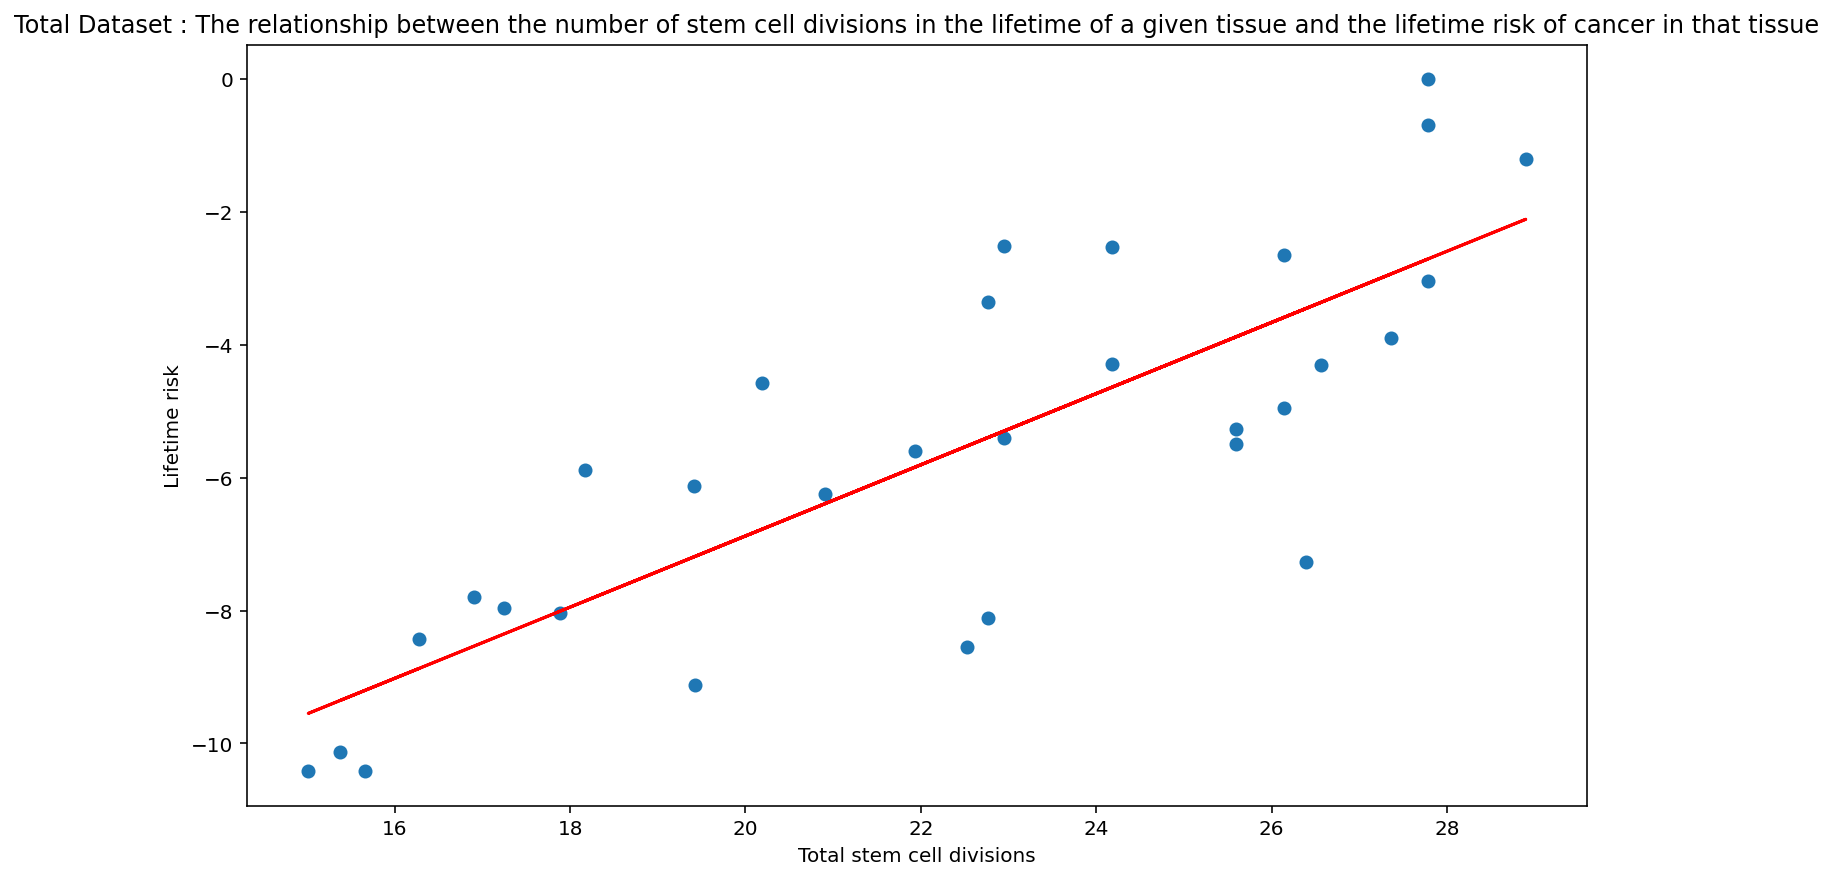

In [90]:
fig, ax = plt.subplots(figsize=(12,7))

ax.set_title('Total Dataset : The relationship between the number of stem cell divisions in the lifetime of a given tissue and the lifetime risk of cancer in that tissue')
ax.set_xlabel('Total stem cell divisions')
ax.set_ylabel('Lifetime risk')
ax.scatter(X_features, y_target, marker='o') # 원본 데이터

# 회귀선 추가
ax.plot(X_features, total_lr_reg.predict(X_features), color='red')
# ax = plt.plot(X_features, lr_reg.predict(X_features),'r') # 회귀선

In [110]:
### data split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

y_target = np.log(df['Lifetime cancer risk'].to_numpy())
X_features = np.log(df['Cumulative number of divisions of all stem cells per lifetime (lscd)'].to_numpy()).reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=29)

train_lr_reg = LinearRegression()
train_lr_reg.fit(X_train, y_train)

y_pred = train_lr_reg.predict(X_test)

print(f'전체 데이터로 학습시킨 모델의 회귀계수(w1): {total_lr_reg.coef_}') # coef
print(f'전체 데이터로 학습시킨 모델의 y절편(w0): {total_lr_reg.intercept_}') # intercept

print(f'훈련 데이터로 학습시킨 모델의 회귀계수(w1): {train_lr_reg.coef_}') # coef
print(f'훈련 데이터로 학습시킨 모델의 y절편(w0): {train_lr_reg.intercept_}') # intercept

전체 데이터로 학습시킨 모델의 회귀계수(w1): [0.5356709]
전체 데이터로 학습시킨 모델의 y절편(w0): -17.58939774088074
훈련 데이터로 학습시킨 모델의 회귀계수(w1): [0.56984458]
훈련 데이터로 학습시킨 모델의 y절편(w0): -18.20929756598014


In [100]:
X_test

array([[20.90926064],
       [22.76292651],
       [26.56029633],
       [26.14269403],
       [22.76292651],
       [27.78665641],
       [28.89802506]])

In [111]:
y_pred = train_lr_reg.predict(X_test)
y_pred

array([-9.44463937, -8.9349036 , -7.14637335, -3.31202507, -2.61915774,
       -5.37281051, -8.57519002])

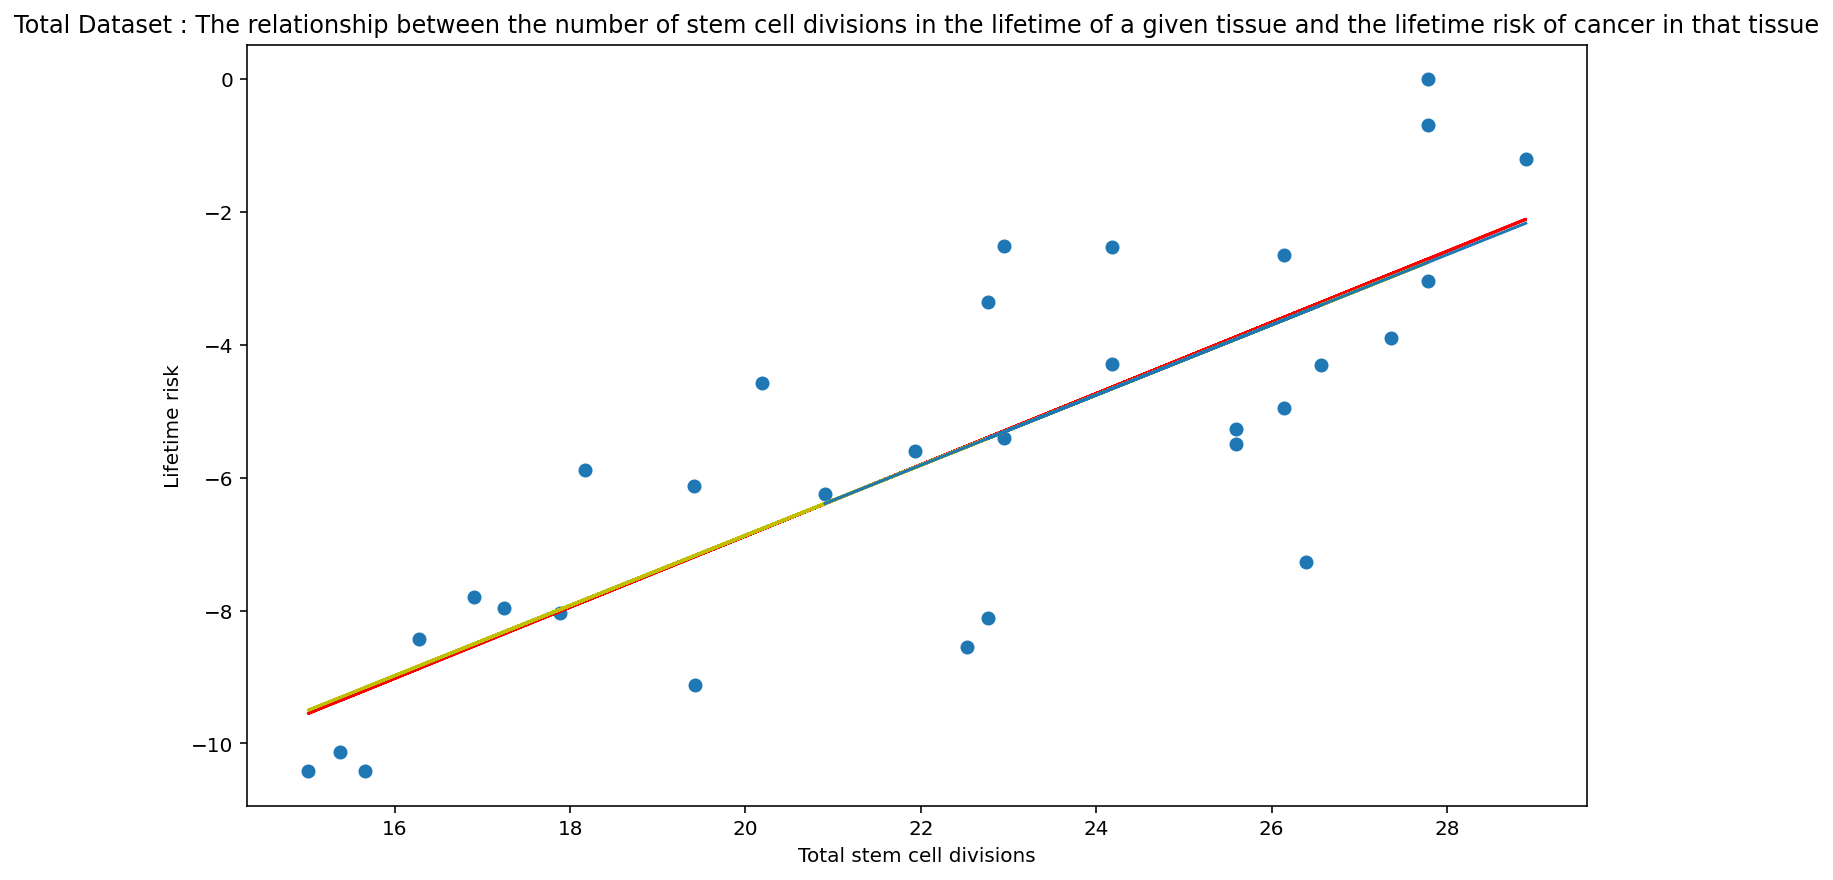

In [101]:
fig, ax = plt.subplots(figsize=(12,7))

ax.set_title('Total Dataset : The relationship between the number of stem cell divisions in the lifetime of a given tissue and the lifetime risk of cancer in that tissue')
ax.set_xlabel('Total stem cell divisions')
ax.set_ylabel('Lifetime risk')
ax.scatter(X_features, y_target, marker='o') # 원본 데이터
# ax.scatter(X_train, y_train, marker='s') # 원본 데이터

# 회귀선 추가
ax.plot(X_features, total_lr_reg.predict(X_features), color='red')
ax.plot(X_train, train_lr_reg.predict(X_train), color='y')
ax.plot(X_test, y_pred)

In [ ]:
ax = plt.figure(figsize=(20, 10))

#plt.title('The relationship between the number of stem cell divisions in the lifetime of a given tissue and the lifetime risk of cancer in that tissue')
plt.xlabel('Total stem cell divisions')
plt.ylabel('Lifetime risk')
ax = plt.scatter(X, y) # 원본 데이터

# 회귀선 추가
ax = plt.plot(X, result.predict(X.reshape(-1, 1)),'r') # 회귀선

plt.show()

In [103]:
from sklearn.model_selection import train_test_split


# 데이터셋을 8:2로 나누기위함
xTrain, xTest, yTrain, yTest = train_test_split(X, 
                                                y, 
                                                test_size = 0.2,
                                                random_state=42)

In [104]:
model = LinearRegression()
result = model.fit(xTrain.reshape(-1,1), yTrain)

In [105]:
print('coef_:', result.coef_) # 계수
print('intercept_:', result.intercept_) # 절편

coef_: [0.57061694]
intercept_: -18.290019458606608


In [106]:
print('coef_:', result.coef_) # 계수
print('intercept_:', result.intercept_) # 절편

coef_: [0.57061694]
intercept_: -18.290019458606608


# Loss 계산

In [ ]:
X_train, X_test, y_train, y_test

In [107]:
y_pred = train_lr_reg.predict(X_test)


In [113]:
print('Training loss: ', mean_squared_error(y_train, train_lr_reg.predict(X_train)))
print('Test loss: ', mean_squared_error(y_test, y_pred))

Training loss:  2.948153967900533
Test loss:  2.3953865932389258


In [112]:
print('Training loss: ', mean_squared_error(y_train, train_lr_reg.predict(X_train)))
print('Test loss: ', mean_squared_error(y_test ,train_lr_reg.predict(X_test)))

Training loss:  2.948153967900533
Test loss:  2.3953865932389258


In [108]:
from sklearn.metrics import mean_squared_error

print('Training loss: ', mean_squared_error(yTrain, result.predict(xTrain.reshape(-1,1))))
print('Test loss: ', mean_squared_error(yTest ,result.predict(xTest.reshape(-1,1))))

Training loss:  2.4042984522183914
Test loss:  4.2012533705740776


In [ ]:
print('Training loss: ', mean_squared_error(yTrain, result.predict(xTrain.reshape(-1,1))))
print('Test loss: ', mean_squared_error(yTest ,result.predict(xTest.reshape(-1,1))))

In [ ]:
ax = plt.figure(figsize=(20, 10))
plt.xlabel('Total stem cell divisions')
plt.ylabel('Lifetime risk')
ax = plt.scatter(xTrain, yTrain, label = 'Train data') # Train data
ax = plt.scatter(xTest, yTest, label = 'Test data') # Test data
ax = plt.plot(xTrain, result.predict(xTrain.reshape(-1, 1)),'r') # 회귀선
plt.legend() # legend 표시

plt.show()